# Your First Algorithm of Machine Learning (ML) - Logistic Regression Proyect

## Table of content

## Explore Data Analysis (EDA)

## 0. Problem Statement
The objective of this exercise is to conduct an in-depth analysis of the bank marketing campaign dataset with an EDA. We'll then develop a predictive model to determine if a client will subscribe to a long-term deposit, which is indicated by the 'y' variable.

### 1. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 2. Data Collection

In [243]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=';')
    total_data.head()
    return total_data

get_data(URL)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 3. Exploration and Data Cleaning

In [244]:
total_data = get_data(URL)

#### 3.1 Drop Duplicate Information

In this case, we don't delete any row beacause there is no duplicated data

In [245]:
total_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 3.2 Drop Irrelevant Information

We remove *contact, day_of_week, month, duration, nr.employed, previous, pdays* columns from the dataset because they are not relevant data for the prediction of the target variable ‘y’ for the model.

In [246]:
total_data = get_data(URL)

def clean_data(df:pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()
    df_.drop(["contact", "day_of_week", "month", "duration", "nr.employed", "previous", "pdays"], axis = 1, inplace = True)
    return df_

cleaned_data = clean_data(total_data)
cleaned_data.head(5)

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no


## 4. Univariate Analysis

#### 4.1 Dividing our dataset into categorical and numerical

In [247]:
numerical_variables = cleaned_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = cleaned_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(cleaned_data.dtypes)

Numerical Variables: ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
Categorical Variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
campaign            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
y                  object
dtype: object


#### 4.2 Categorical Variable Analysis

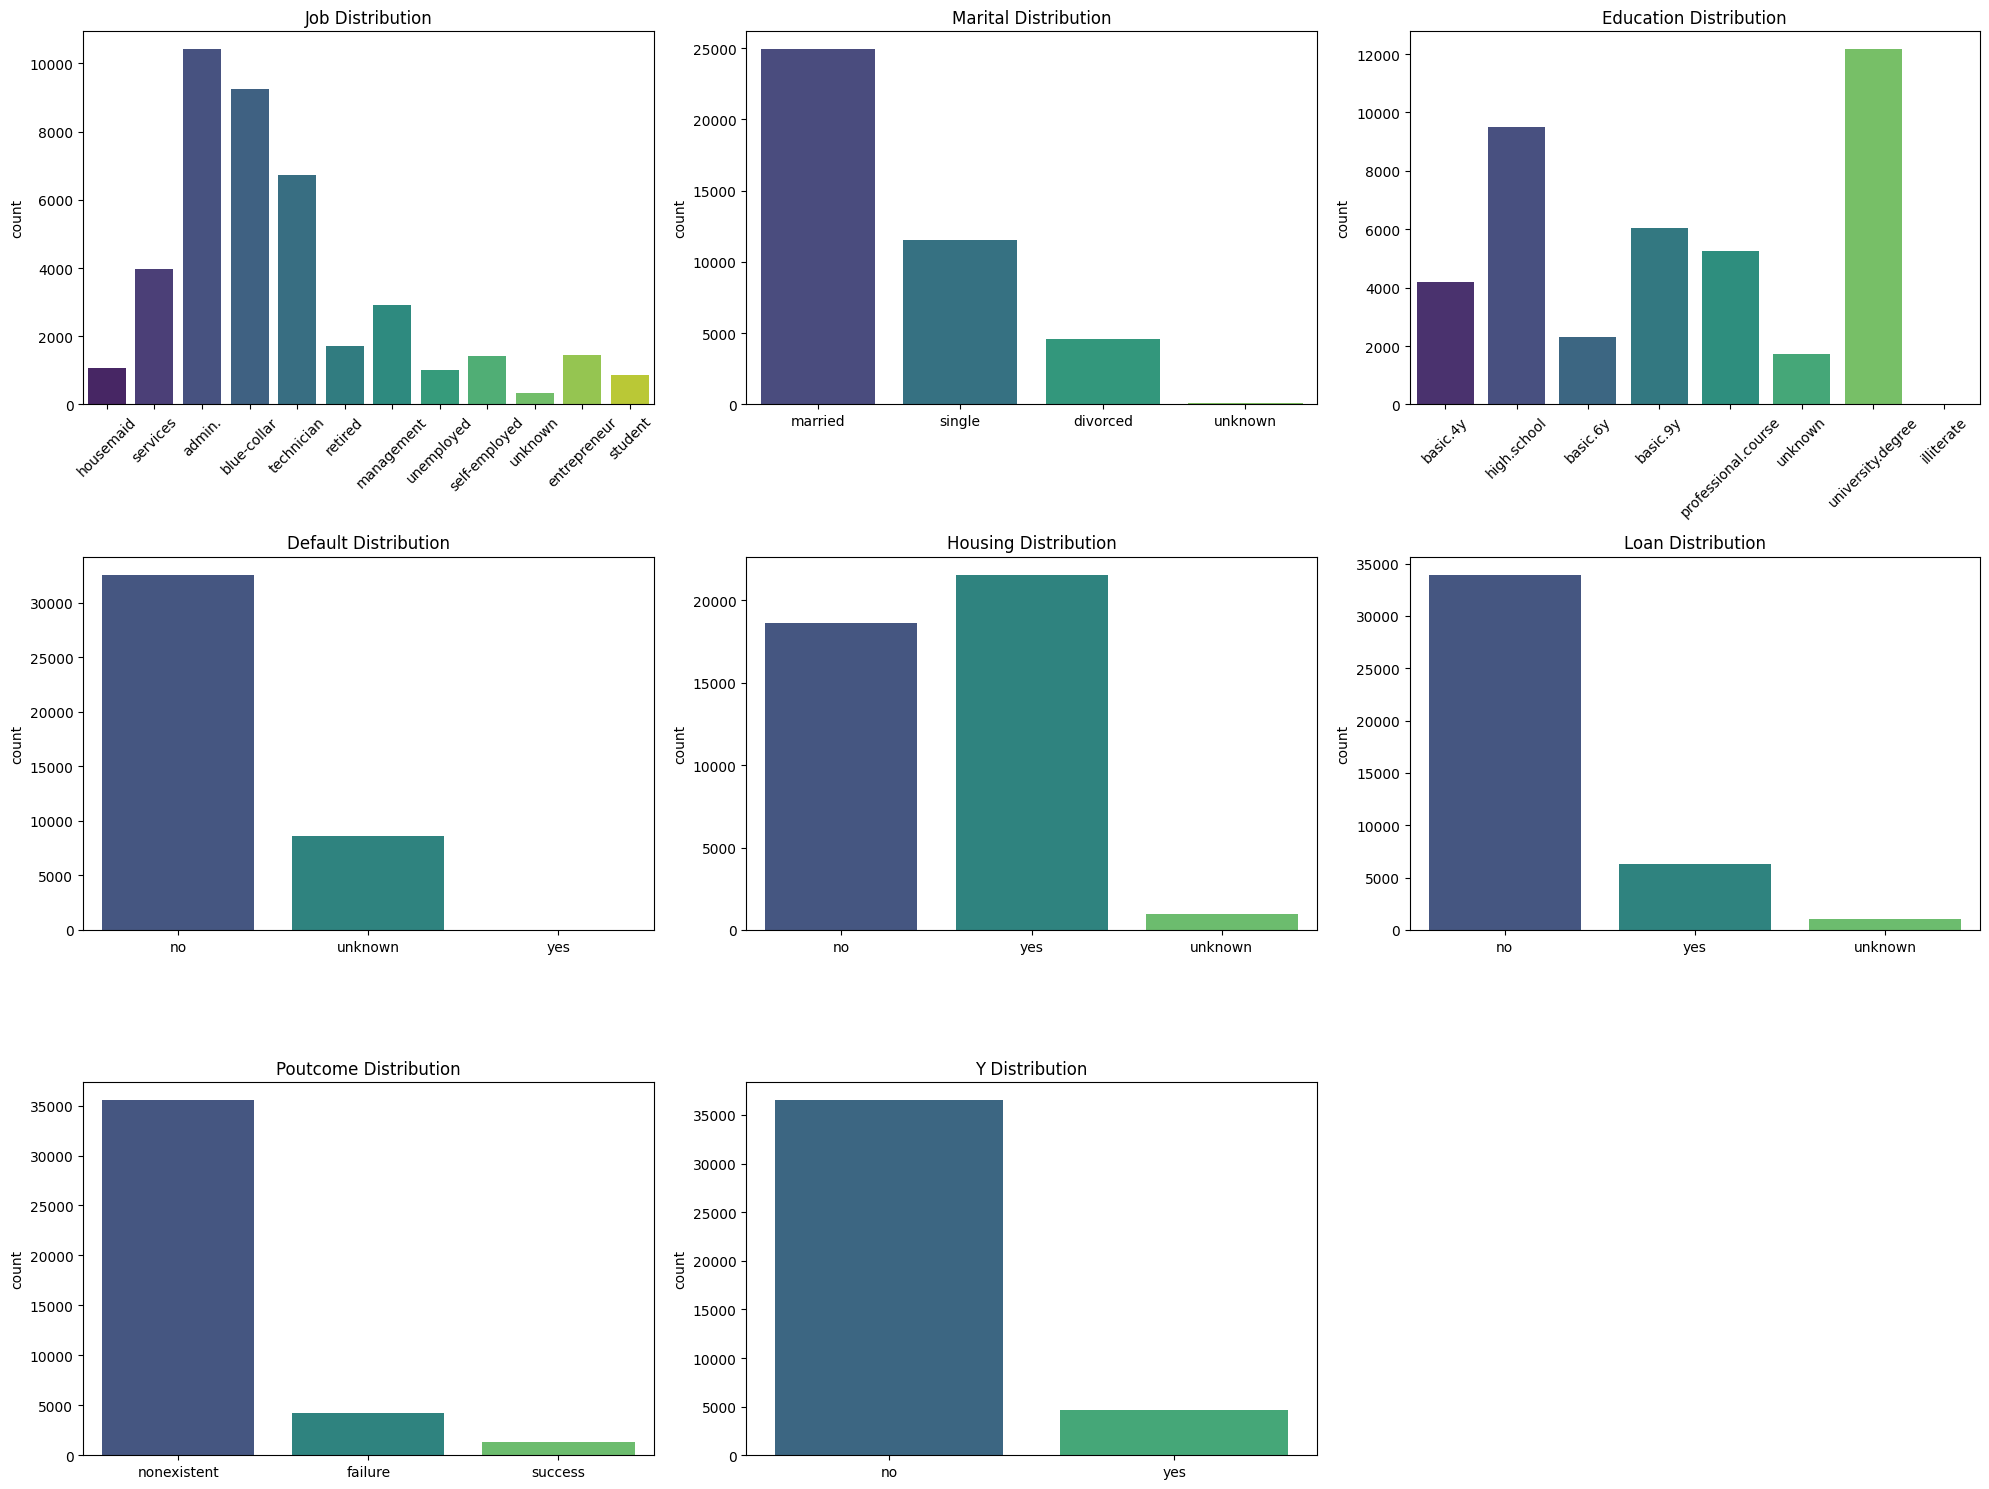

In [248]:
fig, axis = plt.subplots(3, 3, figsize=(20, 15))

def categorical_plot(columns: list[str], cleaned_data: pd.DataFrame, axis_array):
    for i, column in enumerate(columns):
        row = i // axis_array.shape[1]
        col = i % axis_array.shape[1]

        sns.countplot(data=cleaned_data, x=column, ax=axis_array[row, col], palette='viridis')
        axis_array[row, col].set_title(f'{column.title()} Distribution')
        axis_array[row, col].set_xlabel('')

        if cleaned_data[column].nunique() > 5:
            axis_array[row, col].tick_params(axis='x', rotation=45)

    for j in range(len(columns), axis_array.size):
        row = j // axis_array.shape[1]
        col = j % axis_array.shape[1]
        fig.delaxes(axis_array[row, col])

    plt.tight_layout()
    plt.show()

categorical_plot(categorical_variables, cleaned_data, axis)

**Conclusions**:

- **Job Distribution**: The majority of individuals in the dataset are classified into *administrative*, *blue-collar*, and *technician roles*. This suggests these are the primary professional categories represented in the campaign.
- **Marital Distribution**: Most clients are *married* followed by a significant number of singles individuals.
- **Education Distribution**: Individuals with high school education and those with university degree are predominant. This indicates a concentration of the campaigns on these two demographical segments.
- **Default Distribution**: An overwhelming majority of individuals do not have credit defaults. This finding is expected as bank typically avoid offering deposit products to clients with a history of payment defaults.
- **Housing Distribution**: It is observed early half of the clients possess a housing loan while the other half doesn't.
- **Loan Distribution**: Around 85% of clients doesn't have any loan. This may suggest that previous campaigns targeted individuals without any credit obligations.
- **POutcome Distribution (Previous Campaign Outcome)**: The distribution outcome from previous campaigns shows an overwhelminh dominance of the 'nonexistent' category meaning that most clients weren't previously contacted. In addition the 'failure' category is way bigger than the 'success' category meaning improvemnts in marketing campaings should be done.
- **Y Distribution**: Most individuals didn't subscribed to a deposit with only small percentage that already did.

#### 4.3 Numerical Variable Analysis

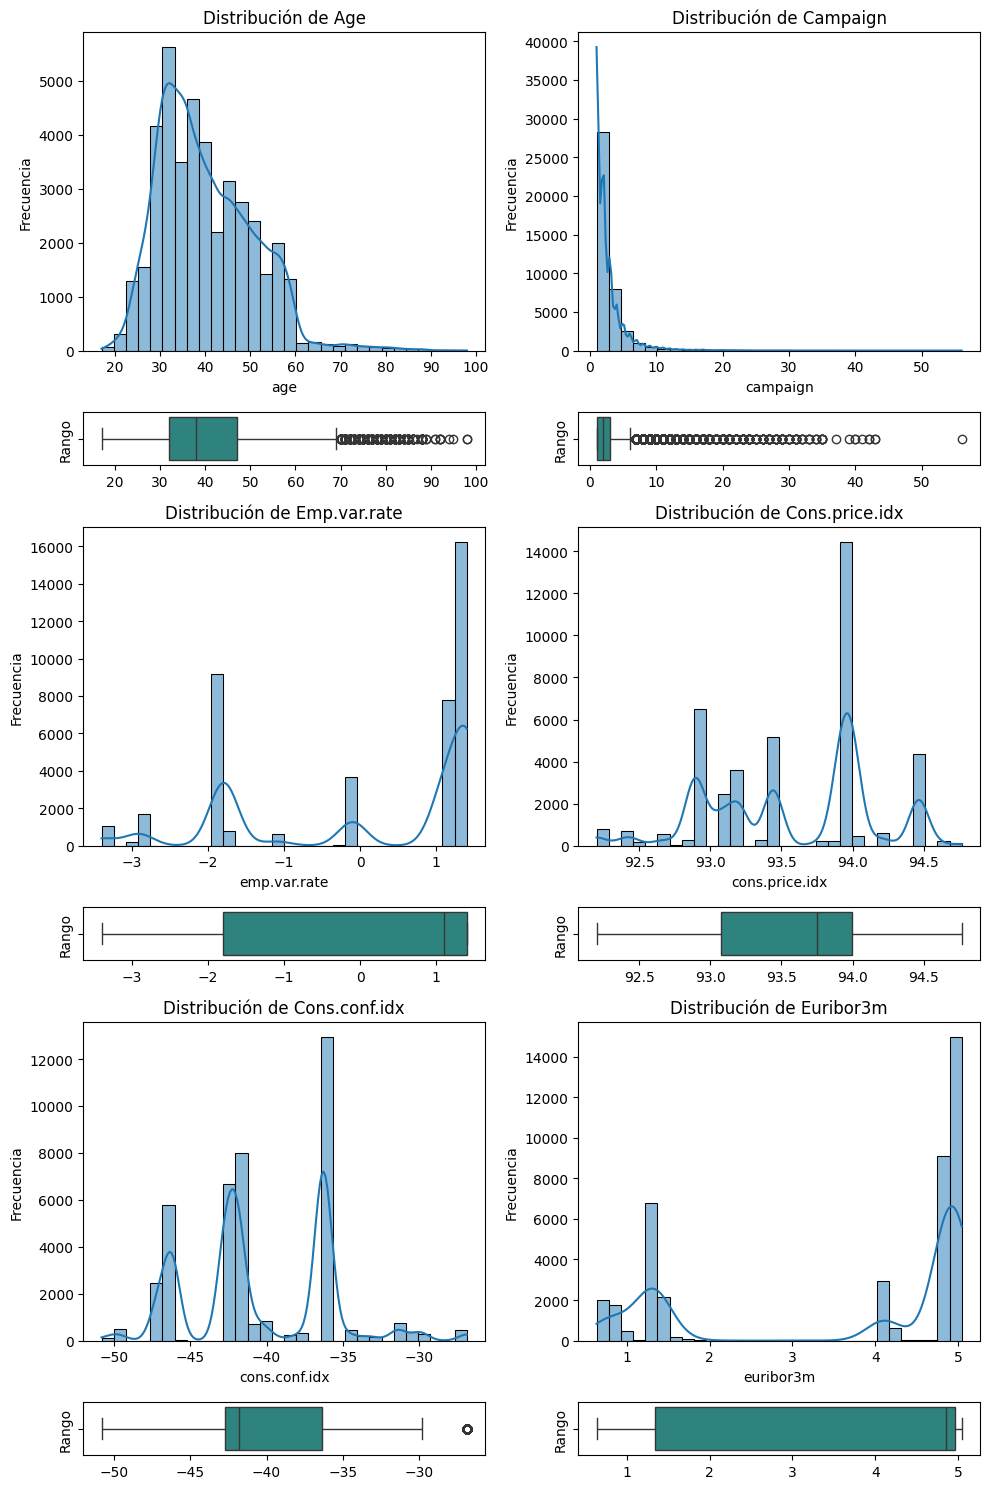

In [249]:
def numerical_plot(columns: list[str], data: pd.DataFrame):
    num_variables = len(columns)
    ncols = 2

    total_rows_for_plots = math.ceil(num_variables / ncols) * 2

    height_ratios = [6 if i % 2 == 0 else 1 for i in range(total_rows_for_plots)]

    fig, axes = plt.subplots(nrows=total_rows_for_plots, ncols=ncols,
                             figsize=(10, 2.5 * total_rows_for_plots),
                             gridspec_kw={'height_ratios': height_ratios})

    if num_variables == 1:
        axes = axes.reshape(-1, 1)

    for i, column_name in enumerate(columns):
        row_pair_idx = i // ncols
        col_in_grid = i % ncols

        hist_row = row_pair_idx * 2
        box_row = hist_row + 1

        ax_hist = axes[hist_row, col_in_grid]
        ax_box = axes[box_row, col_in_grid]

        sns.histplot(data=data, x=column_name, kde=True, bins=30, ax=ax_hist, palette='viridis')
        ax_hist.set_title(f'Distribución de {column_name.replace("_", " ").capitalize()}', fontsize=12)
        ax_box.set_xlabel(column_name.title().replace("_", " "), fontsize=10)
        ax_hist.set_ylabel('Frecuencia', fontsize=10)

        sns.boxplot(data=data, x=column_name, ax=ax_box, palette='viridis')
        ax_box.set_ylabel('Rango', fontsize=10)
        ax_box.set_xlabel('')
        ax_box.tick_params(axis='y', labelleft=False)

    num_plots_generated = len(columns)

    for j in range(num_plots_generated, math.ceil(num_variables / ncols) * ncols):
        row_to_delete_hist = (j // ncols) * 2
        col_to_delete = j % ncols

        if row_to_delete_hist < axes.shape[0] and col_to_delete < axes.shape[1]:
            if not axes[row_to_delete_hist, col_to_delete].get_children():
                fig.delaxes(axes[row_to_delete_hist, col_to_delete])
                fig.delaxes(axes[row_to_delete_hist + 1, col_to_delete])

    plt.tight_layout()
    plt.show()

numerical_plot(numerical_variables, cleaned_data)

**Conclusions:**

- **Age**: The majority of individuals who opt for a long-term deposit are aged *between 20 and 60*, with a particular concentration in the 30-40 age bracket.
- **Campaign**:
- **Emp.var.rate**:
- **Cons.price.idx**:
- **Cons.conf.idx**:
- **Euribor3m**:

## 5. Multivariate Analysis